Se procesan los resultados obtenidos

In [4]:

import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

TEXT_FILE_READ = 'docs/reddit_data_hate_speech.csv'
NUM_TOPICS=30

In [2]:
reddit = pd.read_csv(TEXT_FILE_READ)

In [3]:
def get_counts_words(reddit):
    words_hate_speech = []

    for sent in reddit['body_preprocessing']:
        for word in sent.split():
            words_hate_speech.append(word)

    return Counter(words_hate_speech)

<ipython-input-5-1137aea57ed2>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(30,5))


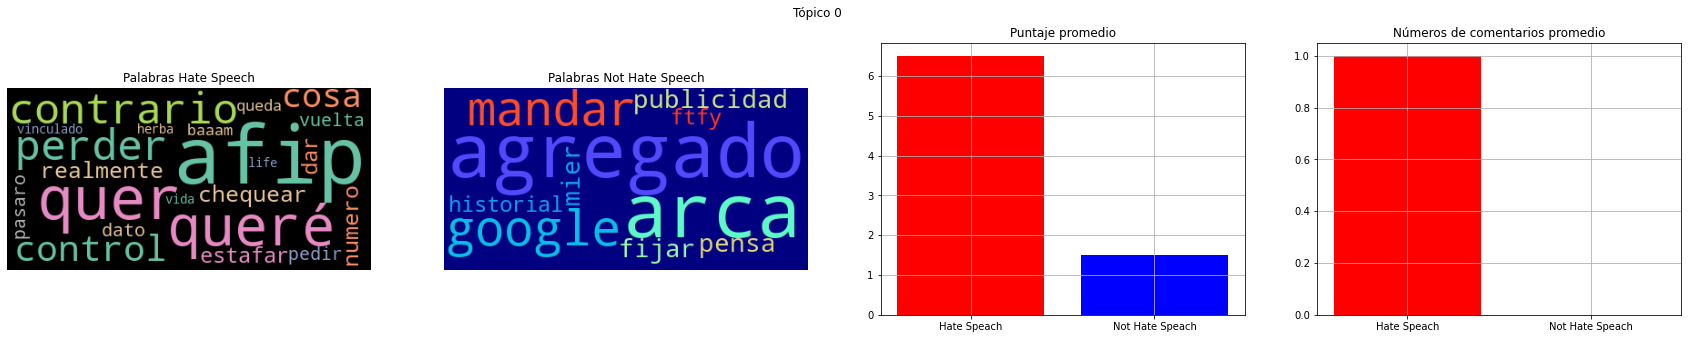

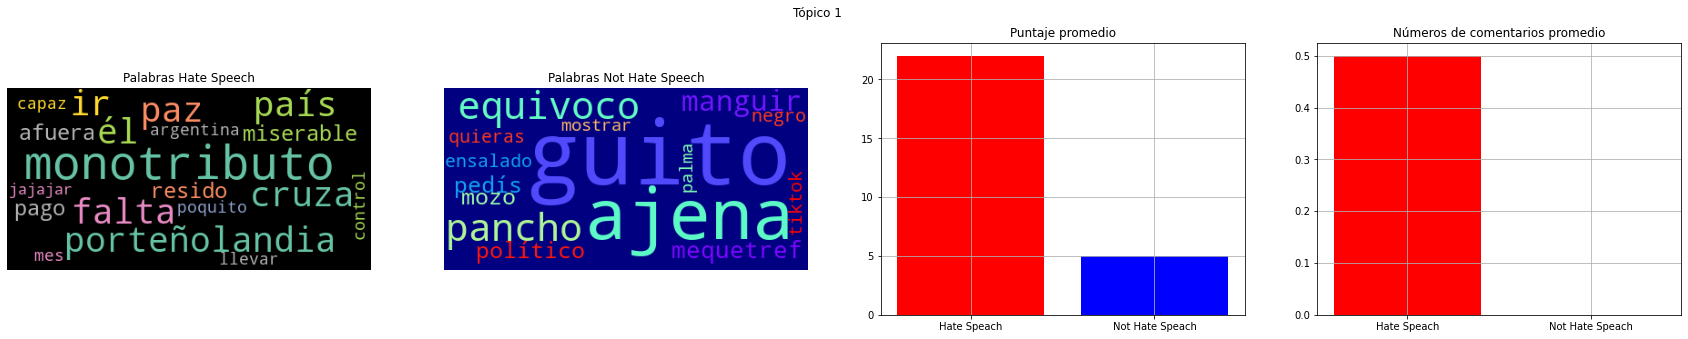

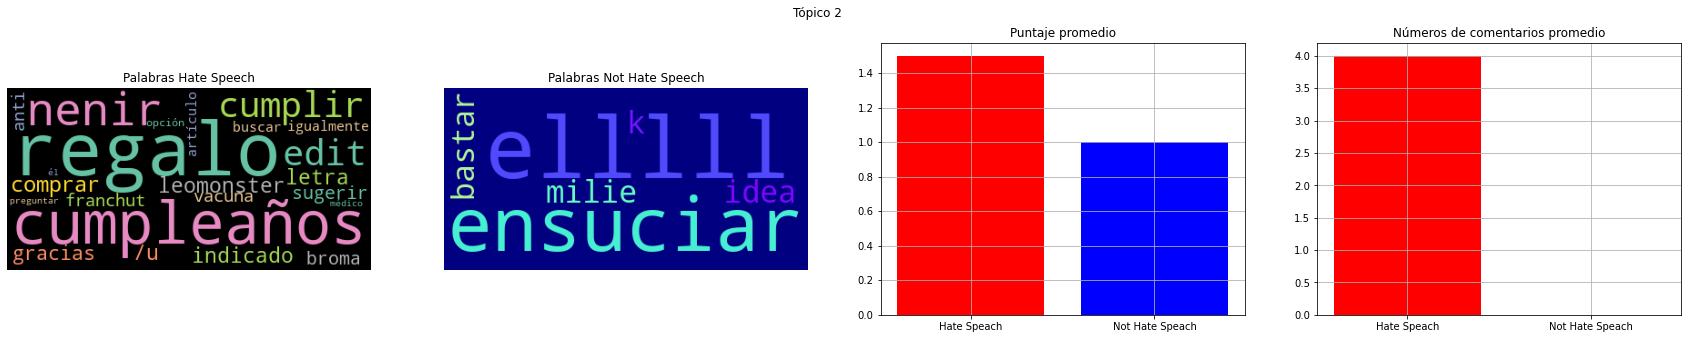

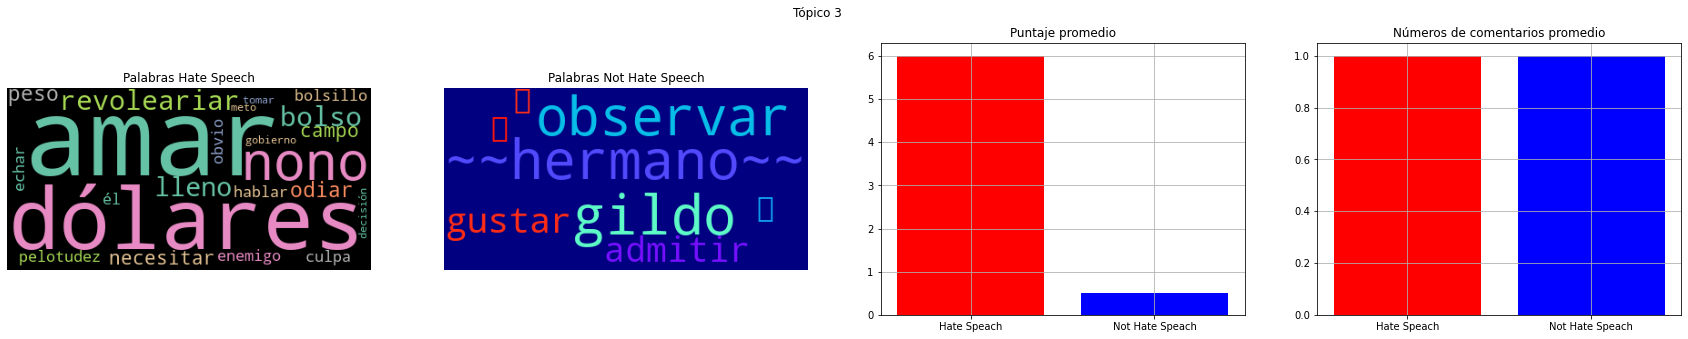

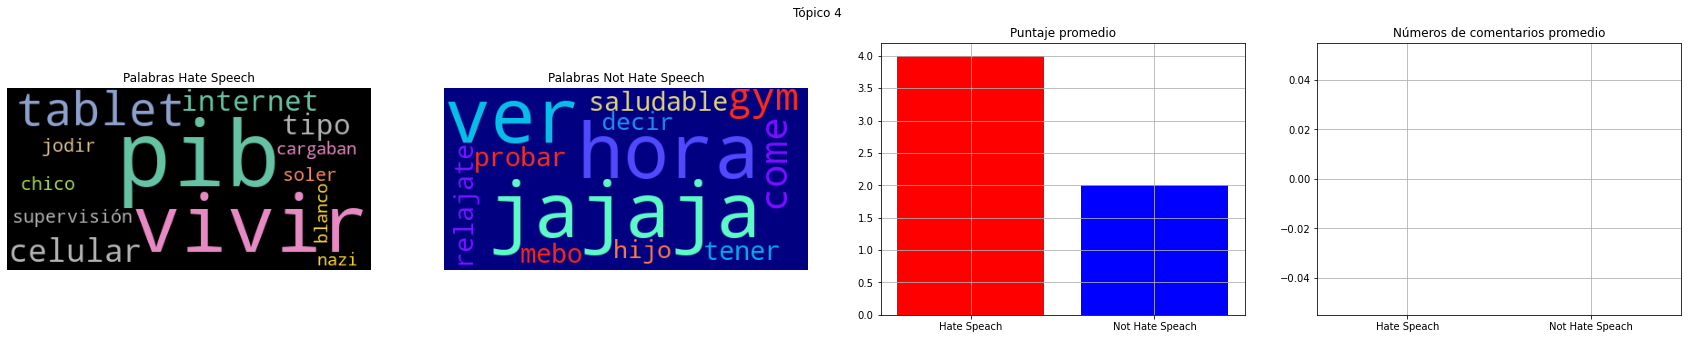

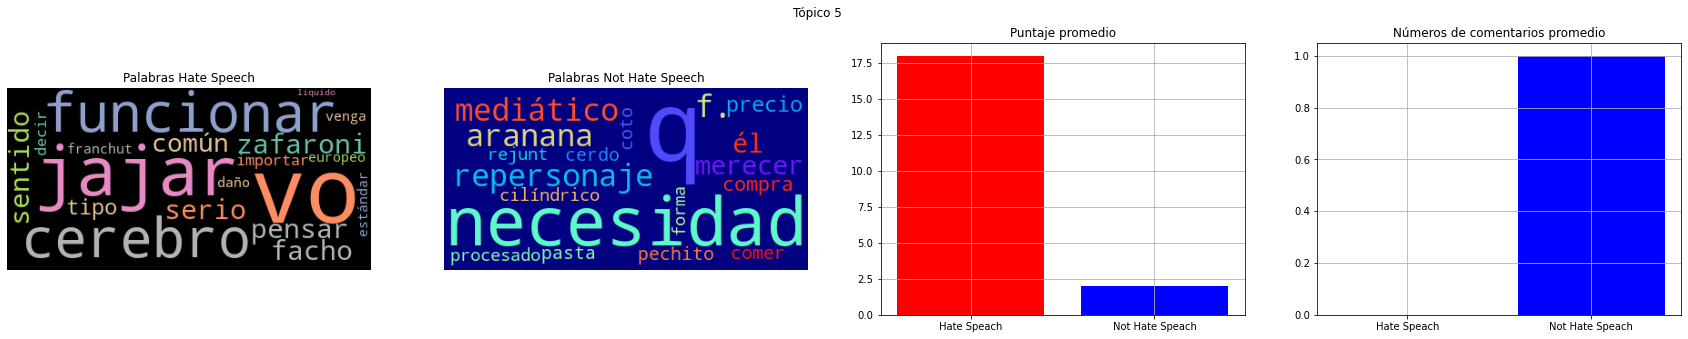

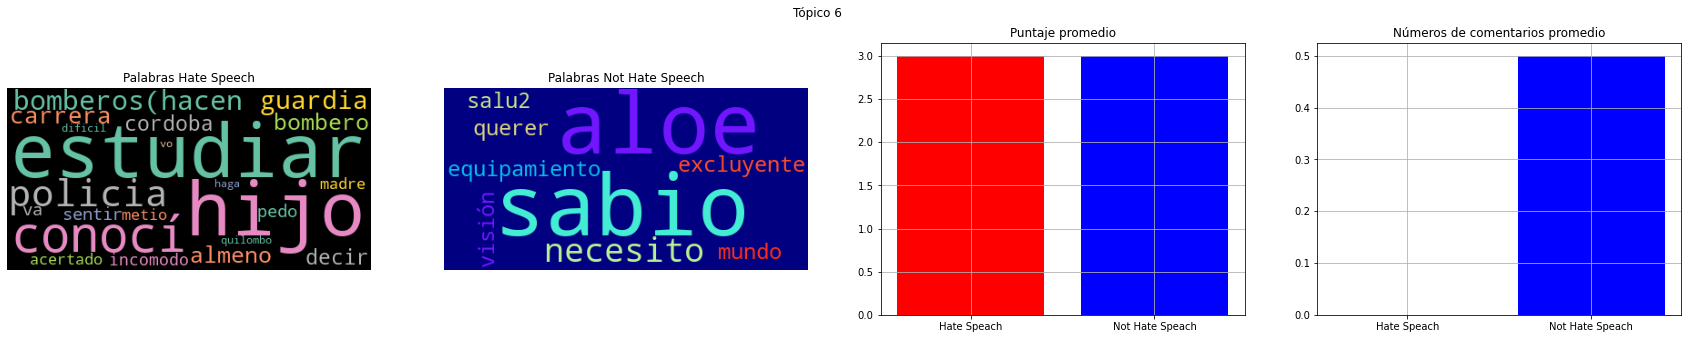

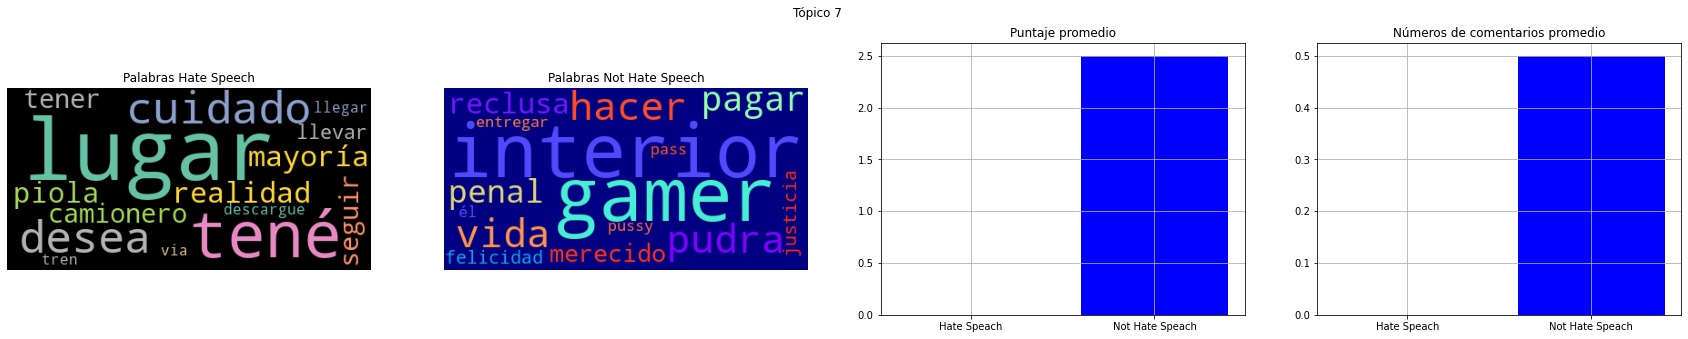

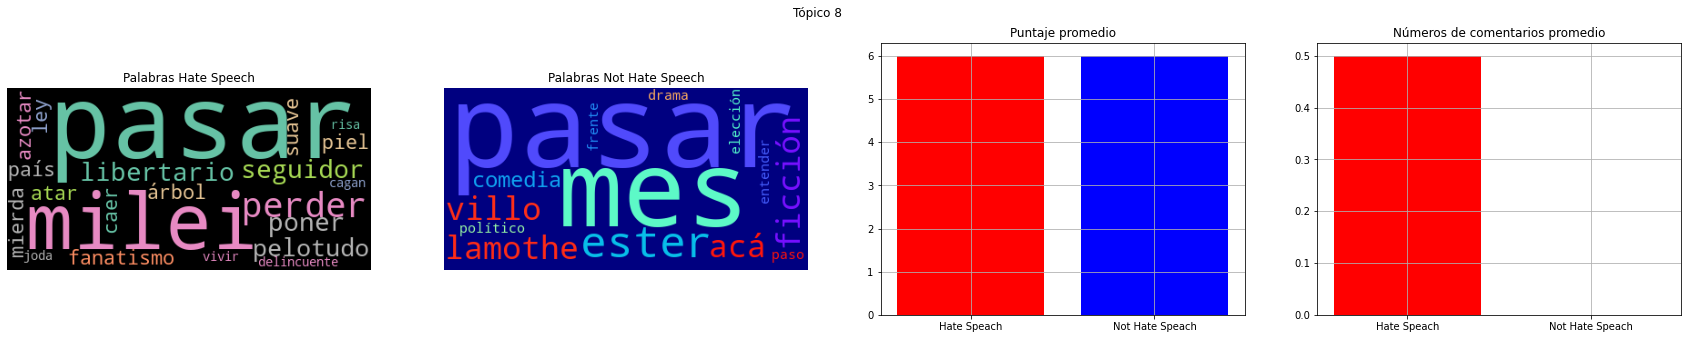

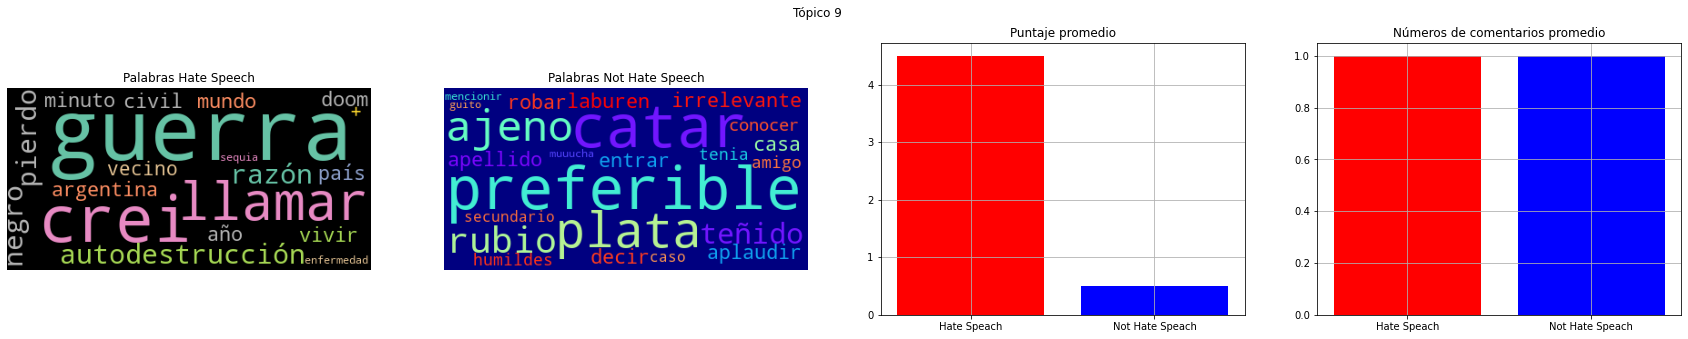

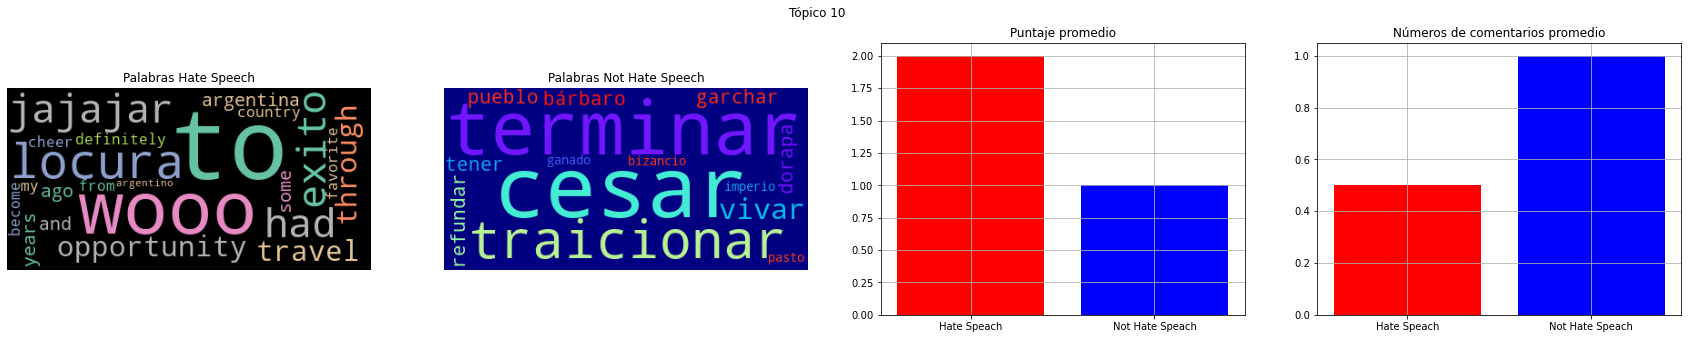

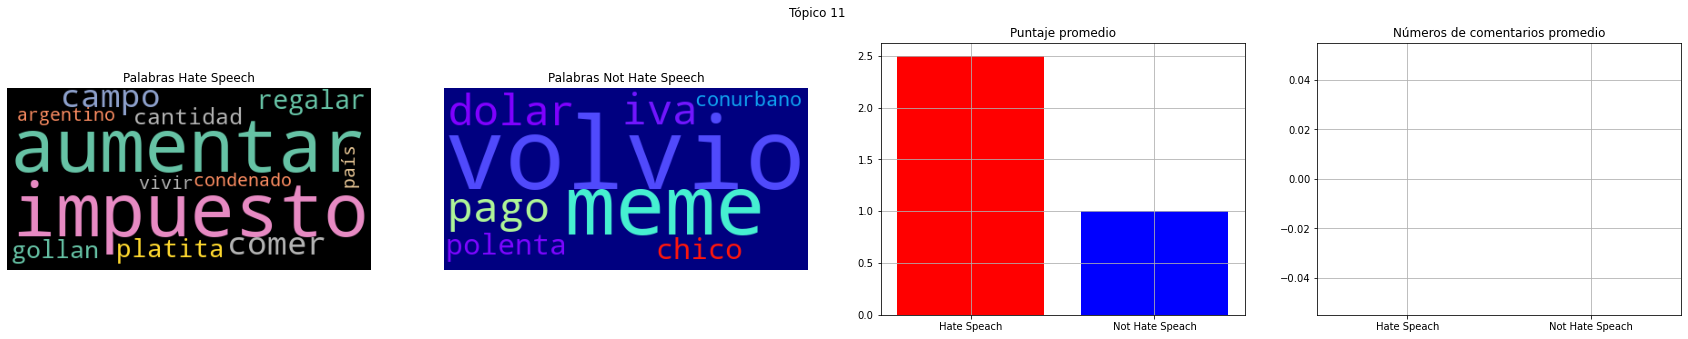

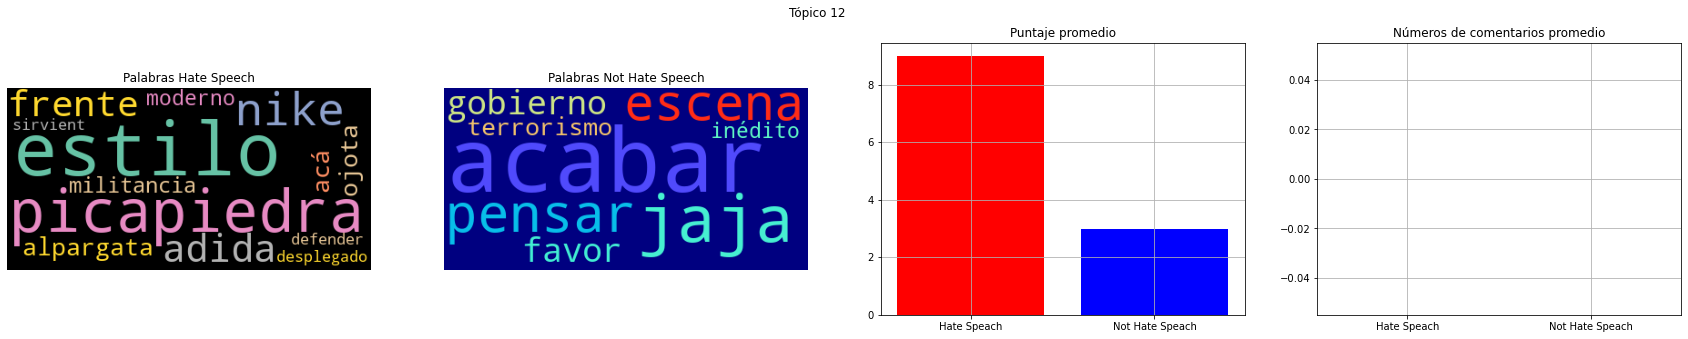

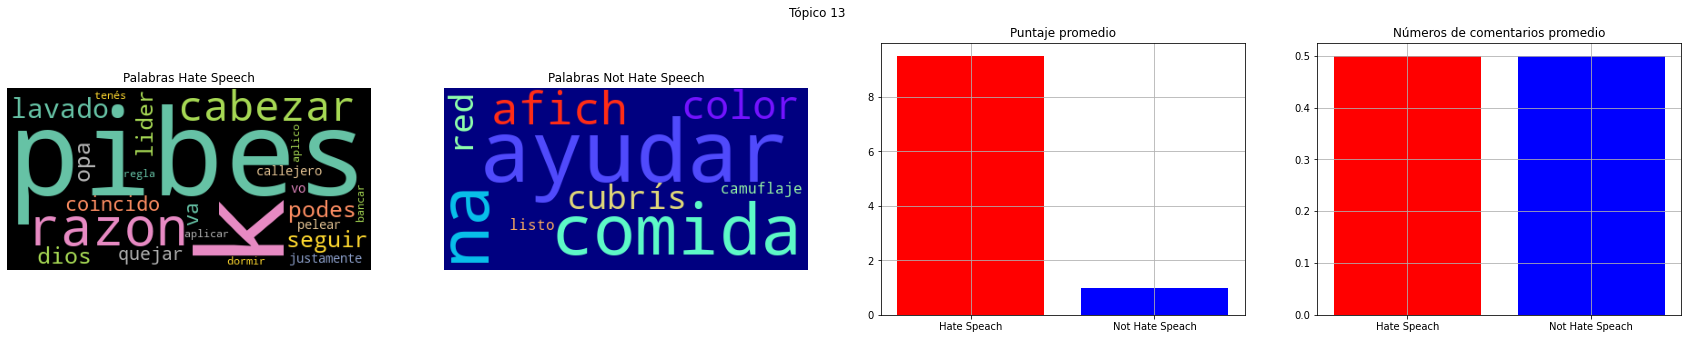

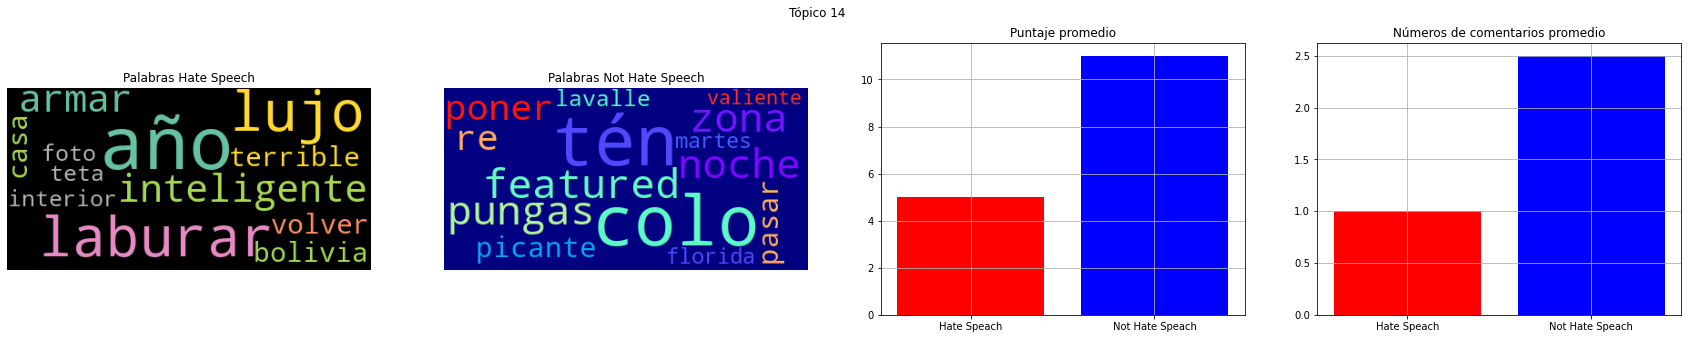

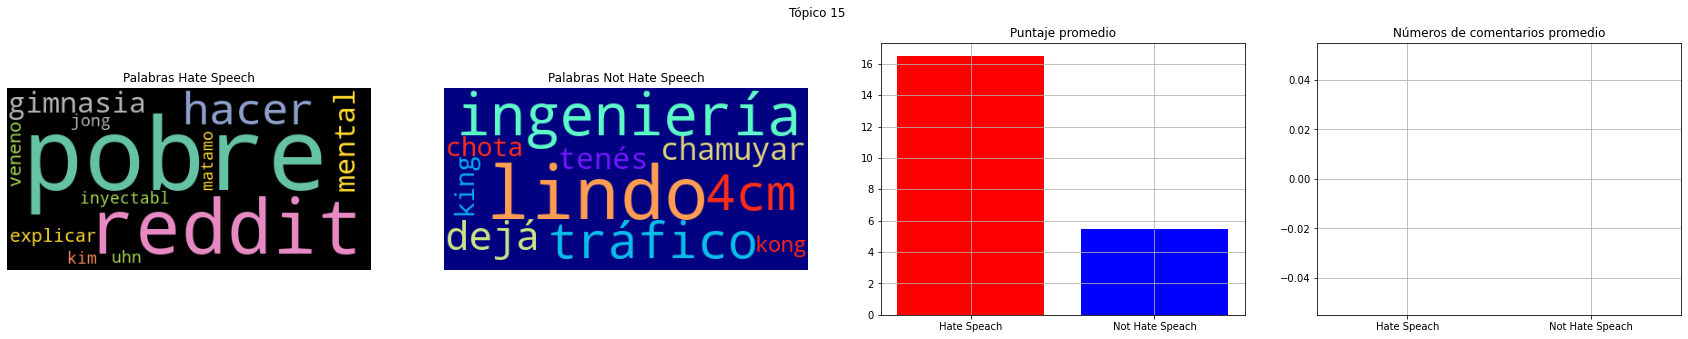

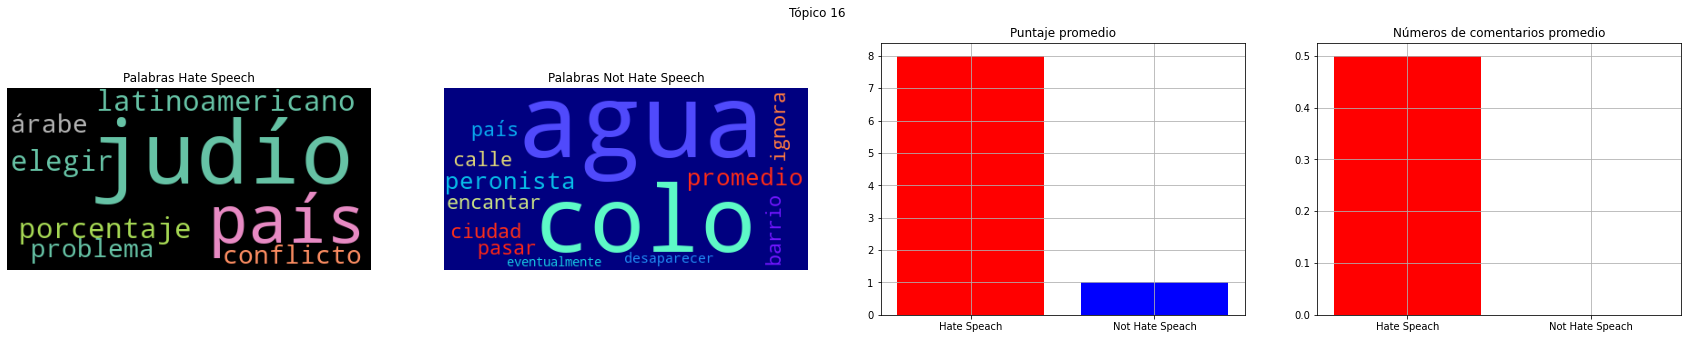

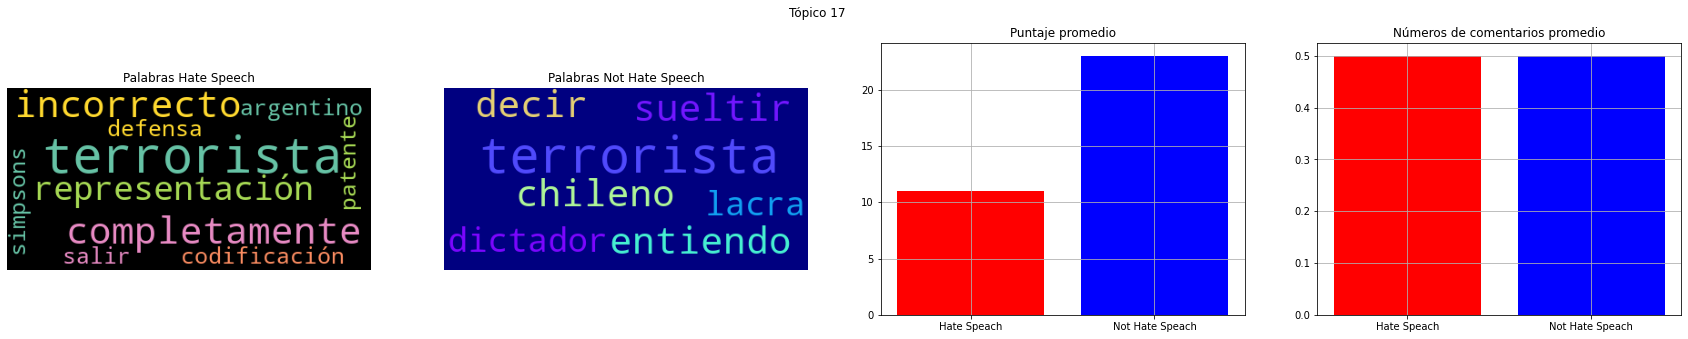

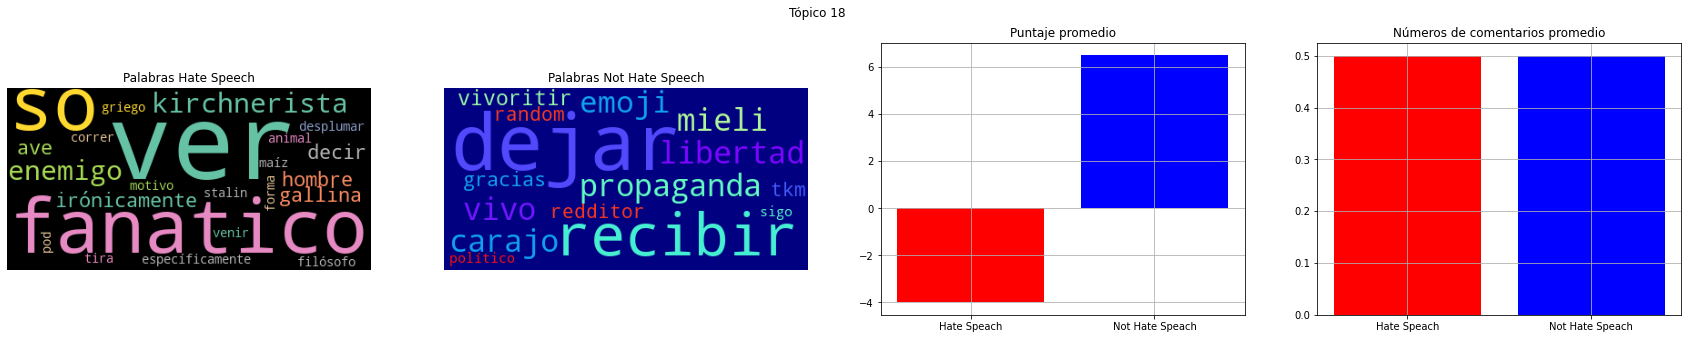

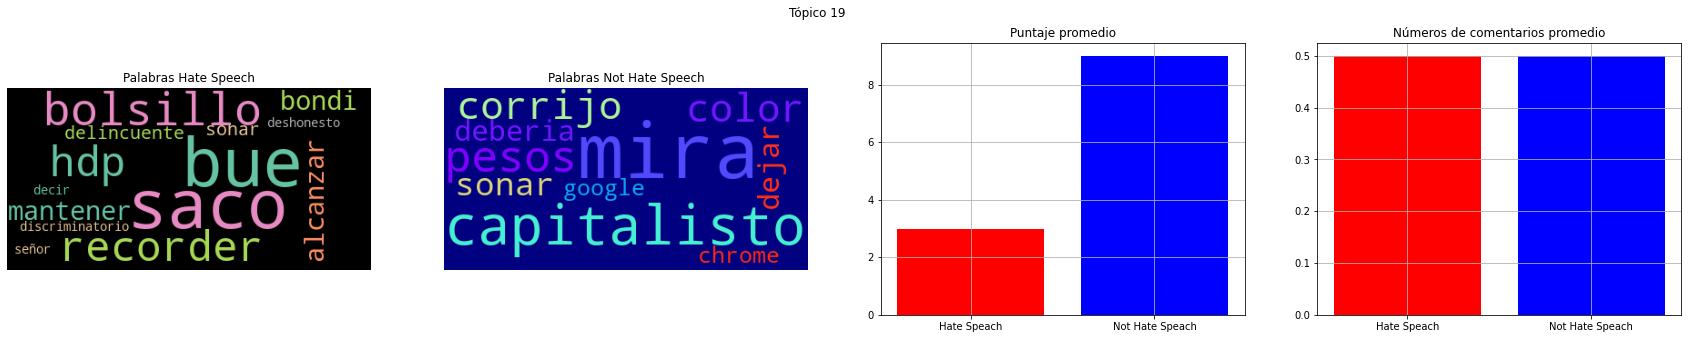

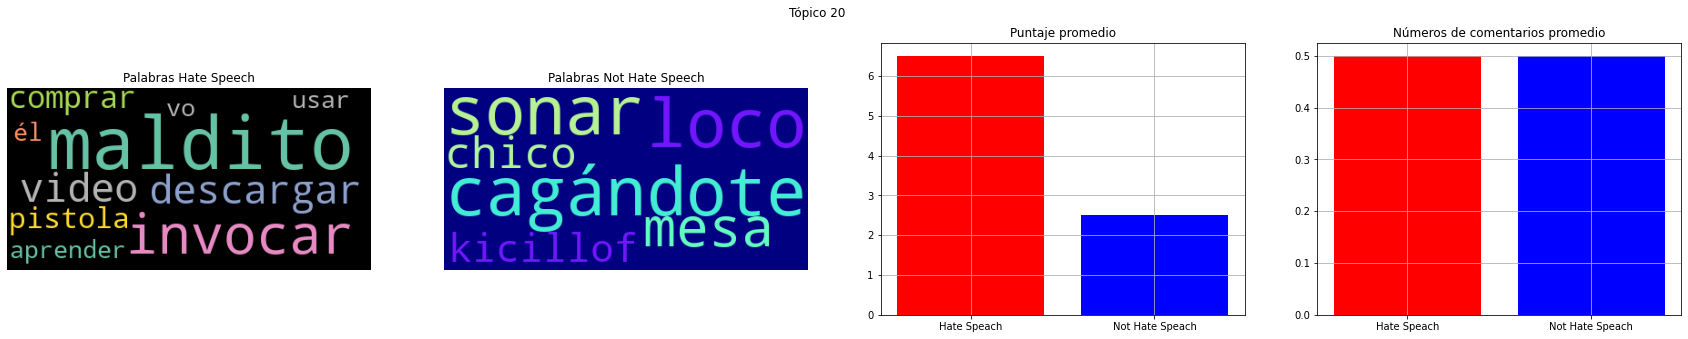

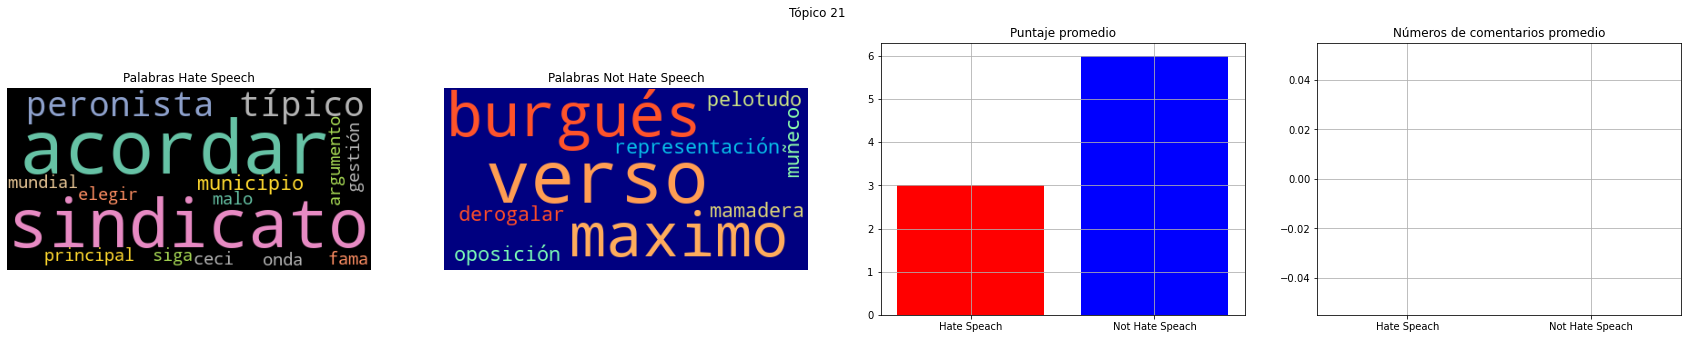

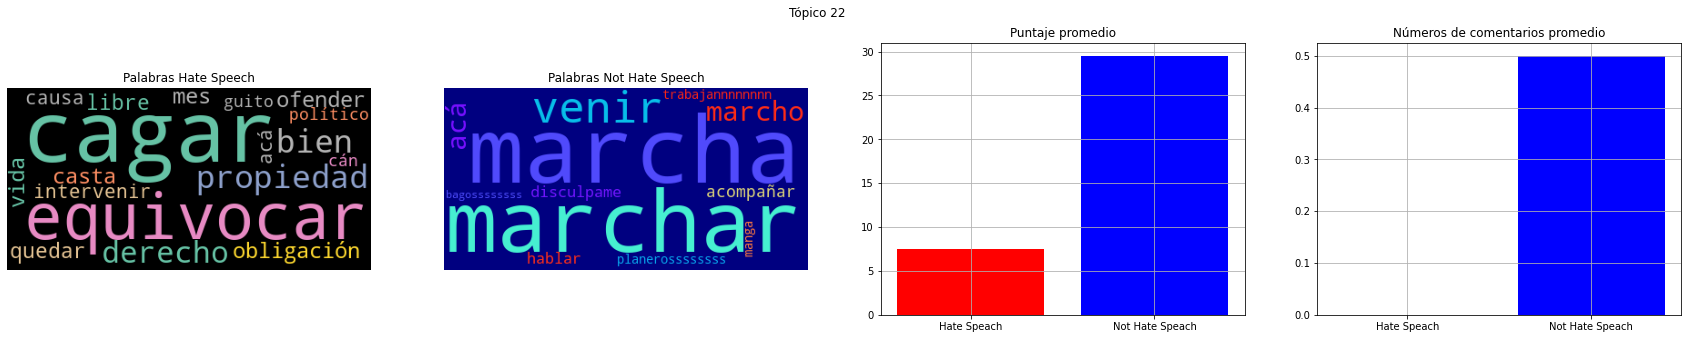

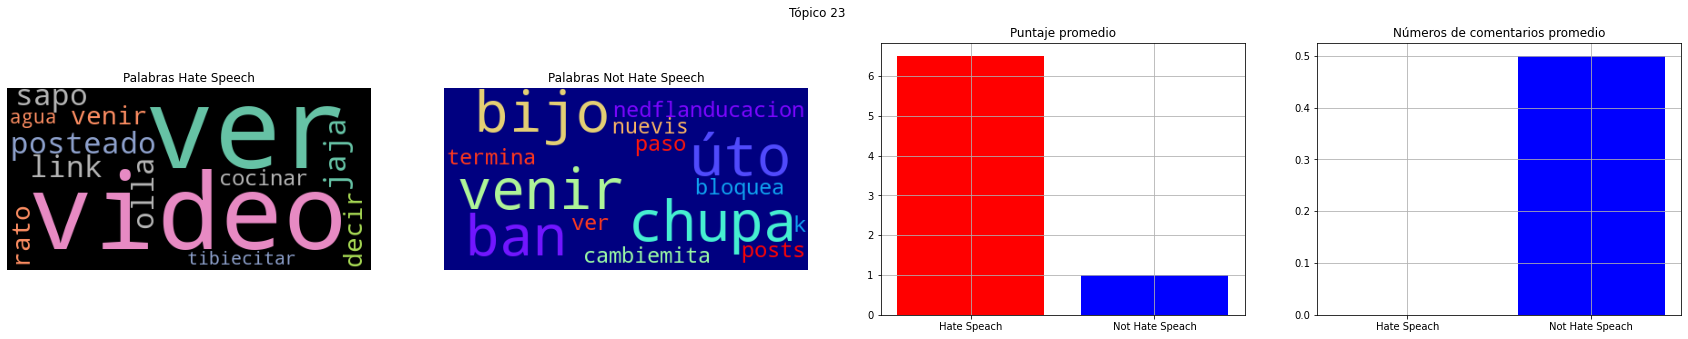

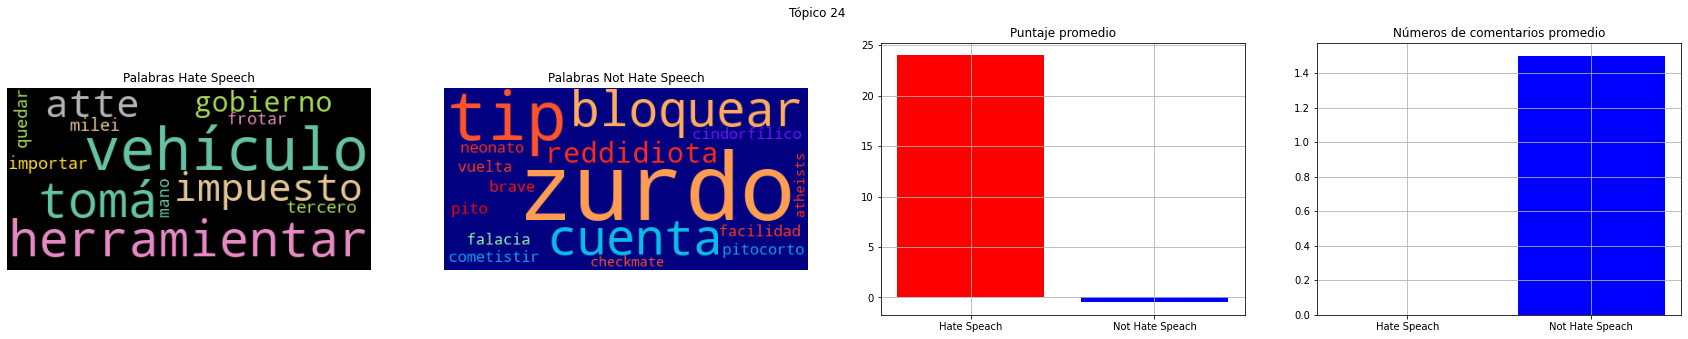

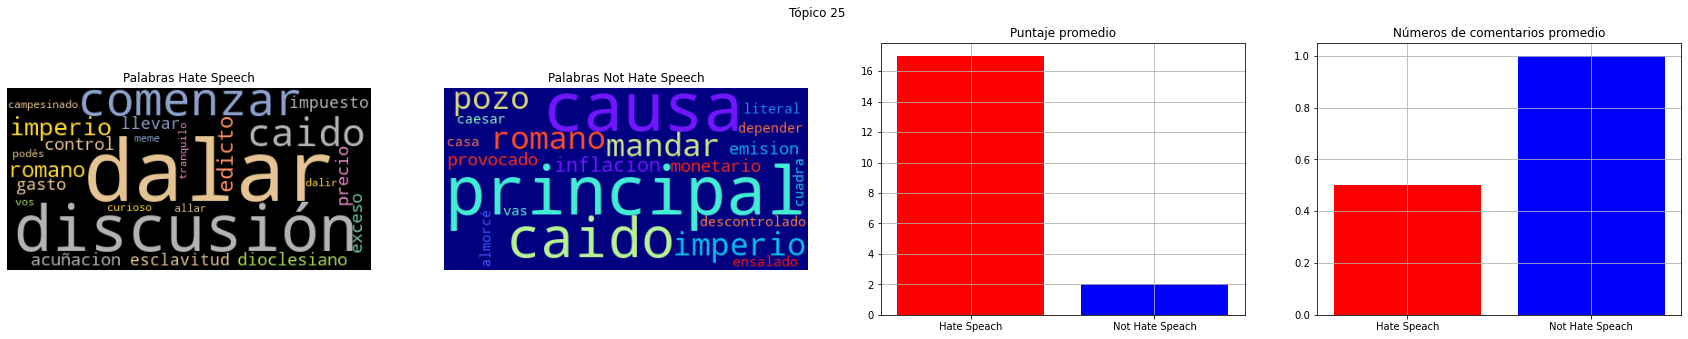

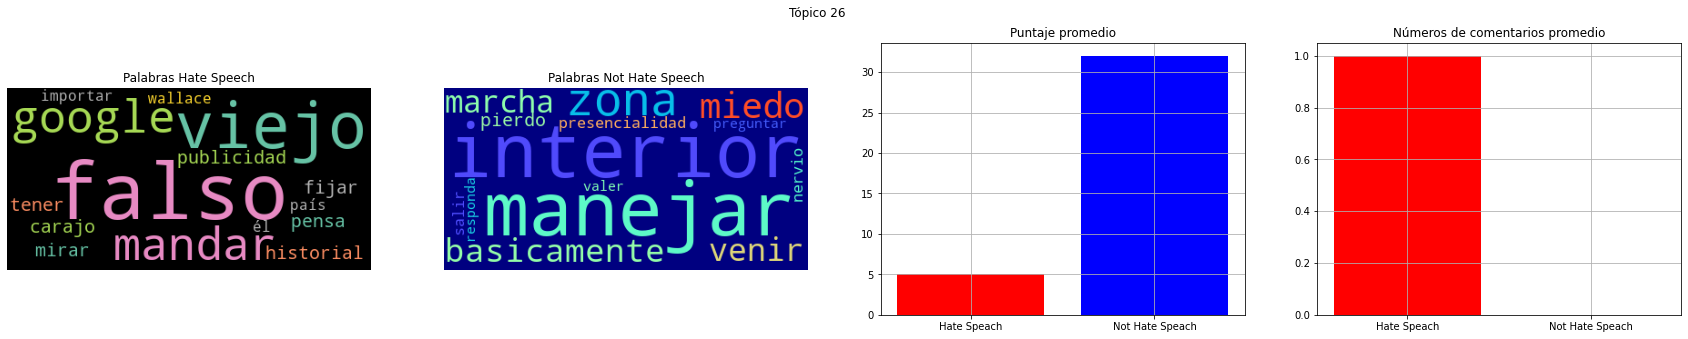

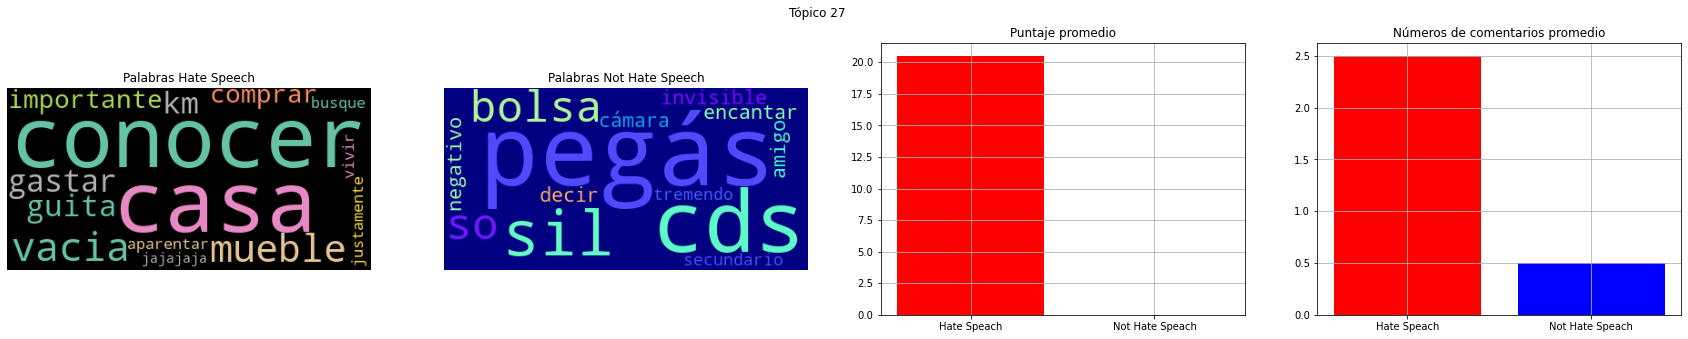

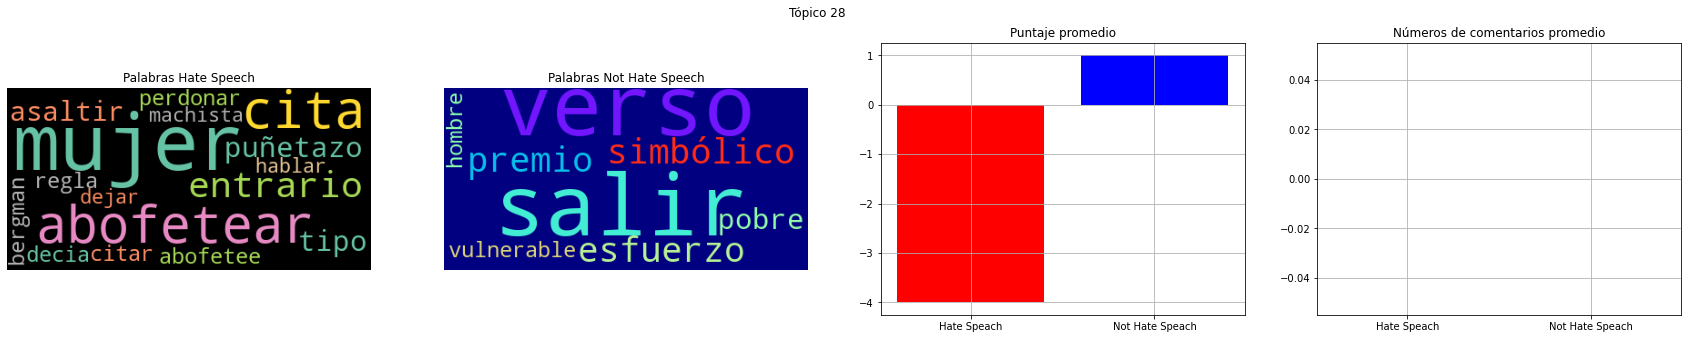

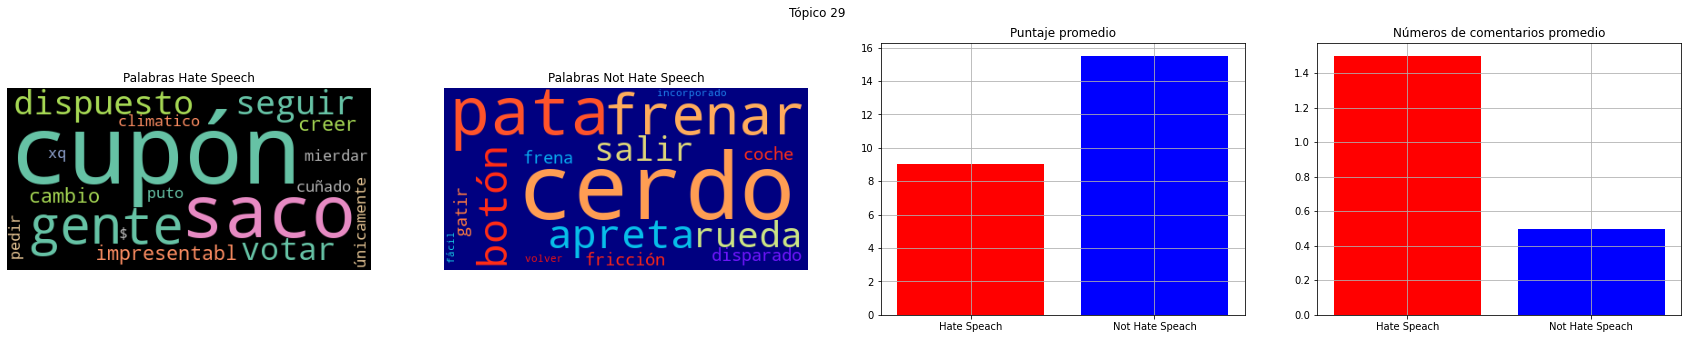

In [5]:
topics = range(0, NUM_TOPICS, 1)


for a in topics:
    reddit_hate_speech = reddit.loc[(reddit["Dominant_Topic"] == a) & (reddit["hate_speech"] == "si")].head(2)
    reddit_not_hate_speech = reddit.loc[(reddit["Dominant_Topic"] == a) & (reddit["hate_speech"] == "no")].head(2)

    types = ['Hate Speach','Not Hate Speach']
    score = [reddit_hate_speech['score'].mean(),reddit_not_hate_speech['score'].mean()]
    num_commits = [reddit_hate_speech['comms_num'].mean(),reddit_not_hate_speech['comms_num'].mean()]
    New_Colors = ['red','blue']

    x = np.linspace(0, 2 * np.pi, 400)
    y = np.sin(x ** 2)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(30,5))
    fig.suptitle('Tópico ' + str(a))
  
    ax1.imshow(WordCloud(random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS)
               .fit_words(get_counts_words(reddit_hate_speech)))
    ax1.axis("off")
    ax1.set_title('Palabras Hate Speech')
    
    ax2.imshow(WordCloud(random_state=1, background_color='navy', colormap='rainbow', collocations=False, stopwords = STOPWORDS)
               .fit_words(get_counts_words(reddit_not_hate_speech)))
    ax2.axis("off")
    ax2.set_title('Palabras Not Hate Speech')
    
    ax3.bar(types, score, color=New_Colors)
    ax3.set_title('Puntaje promedio')
    ax3.grid(True)

    ax4.bar(types, num_commits, color=New_Colors)
    ax4.set_title('Números de comentarios promedio')
    ax4.grid(True)